# Temporal Difference Demo

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from herringbone import MDP, Sarsa, QLearning, TDZero, Render

All initialization tests passed.
imported herringbone without any errors :)


In [2]:
print('Map options:\n\t',
      *sorted([m.stem for m in Path("herringbone/env_core/maps").glob('*.csv')]), sep='\n\t- ')

print('\nSupported configurations:\n\t',
      *sorted([c.stem for c in Path("herringbone/env_core/config").glob('*.json')]), sep='\n\t- ')

Map options:
	
	- danger_holes
	- double_fish
	- easy
	- example
	- example2
	- mega
	- slides
	- wall_of_death

Supported configurations:
	
	- action_config
	- old_actions
	- state_config


In [3]:
map_choice = 'danger_holes'

state_config = "herringbone/env_core/config/state_config.json"
map_ = f"herringbone/env_core/maps/{map_choice}.csv"
action_config = "herringbone/env_core/config/action_config.json"

num_episodes = 10_000
seed = 42
gamma = 1
epsilon = 0.1

sns.set(style="ticks", font="Linux Libertine O")

In [4]:
mdp_s = MDP(
    state_config=state_config,
    map=map_,
    action_config=action_config,
    seed=seed,
    gamma=gamma,
)

mdp_q = MDP(
    state_config=state_config,
    map=map_,
    action_config=action_config,
    seed=seed,
    gamma=gamma,
)

print(mdp_s.get_board())

╔═════════╦═════════╦═════════╦═════════╦═════════╗
║         ║         ║         ║         ║   hole  ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║         ║         ║         ║         ║         ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║         ║         ║   hole  ║         ║         ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║   hole  ║         ║         ║         ║         ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║         ║         ║         ║         ║ <x)))>< ║
╚═════════╩═════════╩═════════╩═════════╩═════════╝


In [5]:
s = Sarsa(num_episodes=num_episodes, mdp=mdp_s, epsilon=epsilon)
q = QLearning(num_episodes=num_episodes, mdp=mdp_q, epsilon=epsilon)

s.run()
q.run()

print(s.policy)
print(q.policy)

╔═════════╦═════════╦═════════╦═════════╦═════════╗
║    →    ║    ↓    ║    →    ║    ↓    ║ ↑/↓/←/→ ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║    ↑    ║    ↓    ║    ↑    ║    ↓    ║    ↓    ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║    ↑    ║    ↓    ║ ↑/↓/←/→ ║    ↓    ║    ↓    ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║ ↑/↓/←/→ ║    →    ║    ↓    ║    ↓    ║    ↓    ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║    →    ║    →    ║    →    ║    →    ║ ↑/↓/←/→ ║
╚═════════╩═════════╩═════════╩═════════╩═════════╝
╔═════════╦═════════╦═════════╦═════════╦═════════╗
║    ↓    ║    →    ║    →    ║    ↓    ║ ↑/↓/←/→ ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║    ↓    ║    ↓    ║    →    ║   ↓/→   ║    ↓    ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║    →    ║    ↓    ║ ↑/↓/←/→ ║   ↓/→   ║    ↓    ║
╠═════════╬═════════╬═════════╬═════════╬═════════╣
║ ↑/↓/←/→ ║   ↓/→   ║    →    ║   ↓/→   ║    ↓    ║
╠═════════╬═

In [6]:
V_s = TDZero(num_episodes=num_episodes, policy=s.policy).run()
V_q = TDZero(num_episodes=num_episodes, policy=q.policy).run()

Render.preview_V(mdp=mdp_s, learned_V=V_s)
Render.preview_V(mdp=mdp_q, learned_V=V_q)

╔════════╦════════╦════════╦════════╦════════╗
║ -14.81 ║ -13.03 ║  4.49  ║ -14.70 ║  0.00  ║
╠════════╬════════╬════════╬════════╬════════╣
║ -14.03 ║ -11.26 ║  2.15  ║ -13.73 ║  7.61  ║
╠════════╬════════╬════════╬════════╬════════╣
║ -11.54 ║ -6.39  ║  0.00  ║  0.83  ║  8.93  ║
╠════════╬════════╬════════╬════════╬════════╣
║  0.00  ║  1.61  ║  7.07  ║  8.92  ║ 10.00  ║
╠════════╬════════╬════════╬════════╬════════╣
║  6.68  ║ -7.66  ║  8.99  ║ 10.00  ║  0.00  ║
╚════════╩════════╩════════╩════════╩════════╝
╔════════╦════════╦════════╦════════╦════════╗
║  1.50  ║ -5.14  ║  4.09  ║  5.65  ║  0.00  ║
╠════════╬════════╬════════╬════════╬════════╣
║ -12.92 ║  2.91  ║  5.10  ║  6.65  ║  7.81  ║
╠════════╬════════╬════════╬════════╬════════╣
║ -8.41  ║  4.21  ║  0.00  ║  7.90  ║  8.97  ║
╠════════╬════════╬════════╬════════╬════════╣
║  0.00  ║  6.77  ║  7.87  ║  8.94  ║ 10.00  ║
╠════════╬════════╬════════╬════════╬════════╣
║  6.48  ║  7.72  ║  8.84  ║  9.97  ║  0.00  ║
╚════════╩═══

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


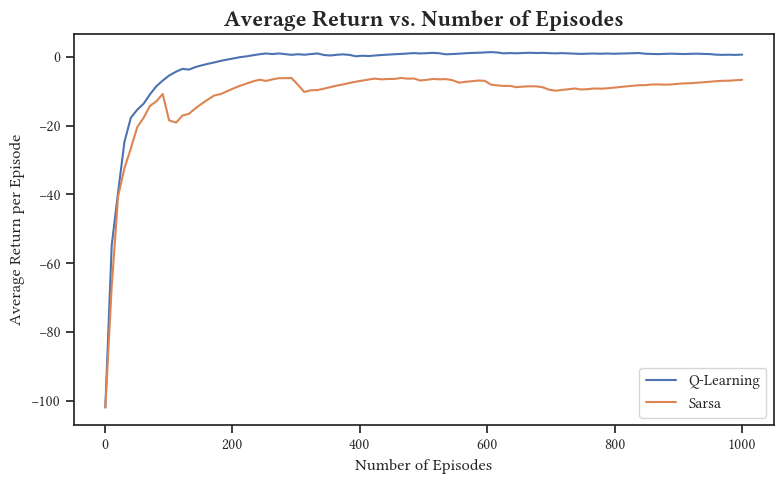

In [7]:
%time

def return_num_e(algorithm):
    num_episode = np.linspace(1, 1_000, 100, dtype=int)
    avg_return = []

    for n in num_episode:
        model = algorithm(
            num_episodes=n,
            mdp=MDP(
                state_config=state_config,
                map=map_,
                action_config=action_config,
                seed=seed,
                gamma=1  # G_t
            ),
            epsilon=epsilon,
        )
        model.run()
        avg_return.append(model.reward_total)

    return num_episode, avg_return / num_episode

 
plt.figure(figsize=(8, 5))

plt.plot(*return_num_e(QLearning), label='Q-Learning')
plt.plot(*return_num_e(Sarsa), label='Sarsa')

plt.xlabel('Number of Episodes')
plt.ylabel('Average Return per Episode')
plt.title('Average Return vs. Number of Episodes',fontsize=16, weight='bold')
plt.legend(loc='best')

plt.tight_layout()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


<IPython.core.display.Javascript object>


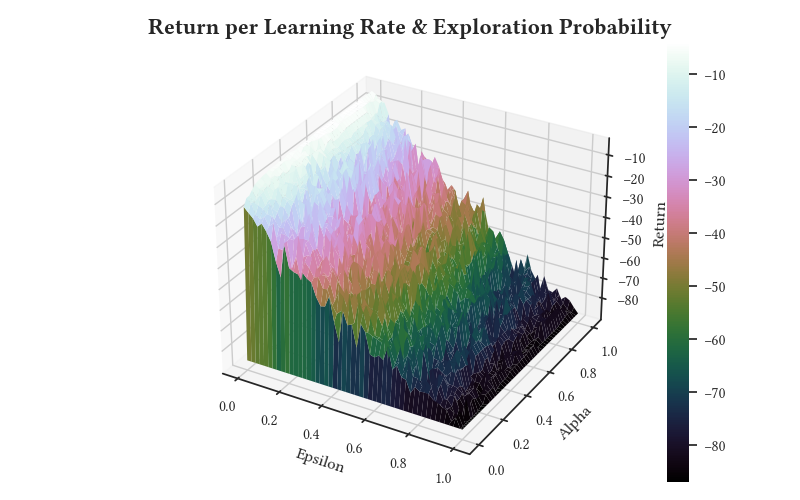

In [8]:
%matplotlib notebook
%time

def return_epsilon_alpha(algorithm):
    num_episodes = 100
    alpha = np.linspace(0, 1, 50)
    epsilon = np.linspace(0, 1, 50)
    return_ = np.zeros((len(epsilon), len(alpha)))

    for i, a in enumerate(alpha):
        for j, e in enumerate(epsilon):
            model = algorithm(
                num_episodes=num_episodes,
                mdp=MDP(
                    state_config=state_config,
                    map=map_,
                    action_config=action_config,
                    seed=seed,
                    gamma=1,  # G_t
                ),
                alpha=a,
                epsilon=e,
            )
            model.run()
            return_[i, j] = model.reward_total / num_episodes

    return epsilon, alpha, return_


fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(111, projection='3d')
epsilon, alpha, avg_return = return_epsilon_alpha(Sarsa)
surf = ax.plot_surface(*np.meshgrid(epsilon, alpha), avg_return, cmap='cubehelix', edgecolor='none')

ax.set_xlabel('Epsilon')
ax.set_ylabel('Alpha')
ax.set_zlabel('Return')
ax.set_title('Return per Learning Rate & Exploration Probability', fontsize=16, weight='bold')

fig.colorbar(surf).outline.set_visible(False)

plt.tight_layout()